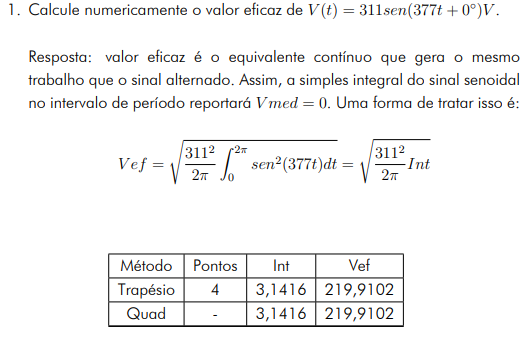

ff(x) = (10 * np.exp(np.divide(-x, 0.001))) ** 2 

w = 0.0499
Pmed = 16.6276
Erro = -0.0001


<ipython-input-1-8d90f46c6f47>:77: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0', '1', '2', '3'])  # formatação do eixo x, V
<ipython-input-1-8d90f46c6f47>:78: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['0', '1', '2', '3'])  # formatação do eixo x, I
<ipython-input-1-8d90f46c6f47>:79: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['0', '0.5', '1', '1.5', '2', '2.5', '3'])  # formatação do eixo x, P


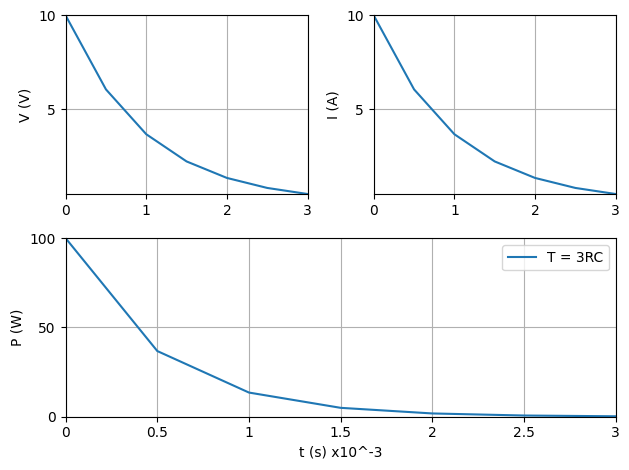

In [1]:
# Capítulo 8: Integração numérica
# Newton-Cotes

#Importa a biblioteca necessária para o problema
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#Define as variáveis
def P(Vc, Ic):
    return np.multiply(Vc, Ic)


def ff(x):
    return (10 * np.exp(np.divide(-x, 0.001))) ** 2
#Parâmetros da questão
R = 1
C = 0.001
Vo = 10
TAL = R * C
t = np.linspace(0, 3 * TAL, 7)
Vc = Vo * np.exp(np.divide(-t, (TAL)))
Ic = (Vo * np.exp(np.divide(-t, (TAL)))) / R
Pmed = Vo ** 2 / (6 * R) * (-np.exp(-6) + 1)
w = C * Vo ** 2 / 2 * (-np.exp(-6) + 1)
#Trapézio
a = round(t[1])
b = t[len(t) - 1]
#Limites
n = 150
#Número de segmentos
x = a
h = (b - a) / n

#Laço de repetição com as equações do problema
Ianalitico = w
s = ff(x)
for i in range(0, n - 1):
    x = x + h
    s = s + 2 * ff(x)
s = s + ff(b)
P = (b - a) * s / (2 * n)
w = P
Pmed = w/(3 * TAL)
Erro = (Ianalitico - P)/Ianalitico
P = Vc * Ic
#Imprime na tela resultado
print('ff(x) = (10 * np.exp(np.divide(-x, 0.001))) ** 2 \n')
print(f'w = {w:.4f}')
print(f'Pmed = {Pmed:.4f}')
print(f'Erro = {Erro:.4f}')

#Visualização

Fig = plt.figure()
plt.style.use('fast')
ax1 = Fig.add_subplot(221)  # Posicionamento dos subplots
ax1.grid(True)  # grade
ax2 = Fig.add_subplot(222)  # Posicionamento dos subplots
ax2.grid(True)  # grade
ax3 = Fig.add_subplot(212)  # Posicionamento dos subplots
ax3.grid(True)  # grade

ax1.set_ylabel('V (V)')
ax2.set_ylabel('I (A)')
ax3.set_ylabel('P (W)')
ax3.set_xlabel('t (s) x10^-3')

ax1.locator_params(axis="y", nbins=2)
ax2.locator_params(axis="y", nbins=2)
ax3.locator_params(axis="y", nbins=2)

Tens = ax1.plot(t, Vc)
Corr = ax2.plot(t, Ic)
Pot = ax3.plot(t, P, label='T = 3RC')

ax1.set_xticklabels(['0', '1', '2', '3'])  # formatação do eixo x, V
ax2.set_xticklabels(['0', '1', '2', '3'])  # formatação do eixo x, I
ax3.set_xticklabels(['0', '0.5', '1', '1.5', '2', '2.5', '3'])  # formatação do eixo x, P

ax1.set_ylim(min(Vc), max(Vc))  # limite do eixo y, V
ax2.set_ylim(min(Ic), max(Ic))  # limite do eixo y, I
ax3.set_ylim(0, 100)  # limite do eixo y, P
ax1.set_xlim(0, 0.003)  # limite do eixo x, V
ax2.set_xlim(0, 0.003)  # limite do eixo x, I
ax3.set_xlim(0, 0.003)  # limite do eixo x, P
plt.legend()
plt.tight_layout()
plt.show()

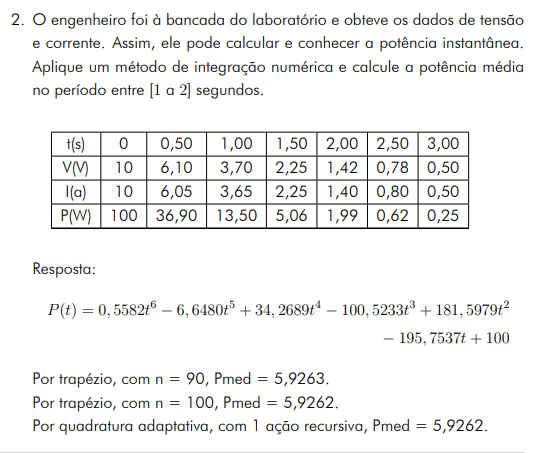

	 -----------------------------------------
	 POTENCIA MÉDIA NO INTERVALO ENTRE 1 E 2 s
	 ----------------------------------------- 

Por trapézio, com n = 100, Pmed = 5.9262.

Por quadratura adaptativa, com 1 ação recursiva, Pmed = 5.9262.



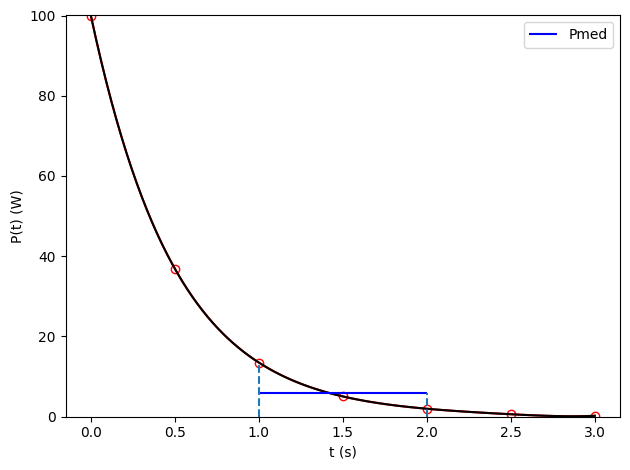

In [2]:
# Integração numérica

#Biblioteca necessária
import numpy as np
import matplotlib.pyplot as plt

#definição das variáveis
def feval(Nomefuncao, *argumentos):
    return eval(Nomefuncao)(*argumentos)


t = [ 0,	0.50,	1.00,	1.50,	2.00,	2.50,	3.00]
P = [100,	36.90,	13.50,	5.06,	1.99,	0.62,	0.25]

plt.plot(t,P,'o',markerfacecolor = 'none',markeredgecolor = 'r')

m=6
c = np.polyfit(t,P,m)  #ajusta por mínimos quadrados um polinômio de n grau
xx = np.linspace(t[0],t[-1],100) # numero de pontos para polinômio de grau maior
yy = np.polyval(c,xx)
plt.plot(xx,yy,'r-')

# c =   [0.5582,   -6.6480,   34.2689, -100.5233,  181.5979, -195.7537,  100.0000]

x=xx
ff = 0.5582*x**6 -6.6480*x**5 +34.2689*x**4 -100.5233*x**3 +181.5979*x**2 -195.7537*x +100.0000
plt.plot(x,ff,'k-')
plt.xlabel('t (s)')
plt.ylabel('P(t) (W)')

a = 1 
b = 2

tit = f'POTENCIA MÉDIA NO INTERVALO ENTRE {a} E {b} s'
#Imprime na tela resultados 
print('\t','-'*len(tit))
print(f'\t {tit}')
print('\t','-'*len(tit),'\n')
# trapezio
n=100

x = np.linspace(a,b,n)
ff = 0.5582*x**6 - 6.6480*x**5 +  34.2689*x**4 - 100.5233*x**3 + 181.5979*x**2 - 195.7537*x + 100.0000
Int = np.trapz(ff,x) 
Pmed = (1/(b-a))*Int

print(f'Por trapézio, com n = {n}, Pmed = {Pmed:.4f}.\n')


# Quadratura adaptativa


def quadsetp(f,a,b,tol,fa,fc,fb):
  
  h = b-a
  c = (a+b)/2
  fd = feval('f', (a+c)/2)
  fe = feval('f', (c+b)/2)
  q1 = h/6 * (fa + 4*fc + fb)
  q2 = h/12 * (fa + 4*fd + 2*fc + 4*fe + fb)
  i=1
  if abs(q2-q1) <= tol:
      q = q2 + (q2 - q1)/15
  else:
      qa = quadsetp(f,a,c,tol,fa,fd,fc)
      qb = quadsetp(f,c,b,tol,fc,fe,fb)
      q = qa + qb
  return q

f = lambda x: 0.5582*x**6 - 6.6480*x**5 +  34.2689*x**4 - 100.5233*x**3 + 181.5979*x**2 - 195.7537*x + 100.0000

c = (a+b)/2
fa = feval('f',a)
fb = feval('f',b)
fc = feval('f',c)
tol = 1*np.exp(-.01)

q = quadsetp(f,a,b,tol,fa,fc,fb)

Int = q
Pmed = (1/(b-a))*Int

print(f'Por quadratura adaptativa, com 1 ação recursiva, Pmed = {Pmed:.4f}.\n')
plt.ylim(0,max(yy))
plt.hlines(xmin = a,xmax = b, y = Pmed,label = 'Pmed', color = 'blue')
plt.vlines(ymax=feval('f',a),ymin = 0, x =a,linestyles = 'dashed' )
plt.vlines(ymax=Pmed,ymin = 0, x =b ,linestyles = 'dashed')
plt.tight_layout()
plt.legend()
plt.show()